# Group 4

## Title: Birds Of Prey

**GROUP MEMBERS**

1. AHMAD RAZIN BIN SARIFUDDIN            - 52213124175 (Data Engineer)
2. FARIS IMADI BIN MOHD YUSOFF           - 52213124723 (Data Scientist)
3. MUHAMMAD FAIZUDDIN BIN ABD HAFIDZ     - 52213124752 (Data Analyst)

**Loading, Preprocessing, and Visualizing Image Data with TensorFlow**

- Load and preprocess images from a directory using TensorFlow's ImageDataGenerator.
- Split the dataset into training and validation sets.
- Visualize a batch of sample images along with their corresponding class labels.

**Code Overview**

- Image Preprocessing: Pixel values are normalized to a range of [0, 1] for better model performance.
- Dataset Splitting: The dataset is divided into training (80%) and validation (20%) subsets.
- Batch Loading: Images and labels are loaded in batches to optimize memory usage.
- Visualization: A grid of 10 sample images is displayed with their class labels.

2025-01-20 13:06:03.891872: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 13:06:03.916977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737349563.940039    8262 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737349563.946454    8262 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 13:06:03.975772: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Found 8000 images belonging to 8 classes.
Found 2000 images belonging to 8 classes.


I0000 00:00:1737349567.523129    8262 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


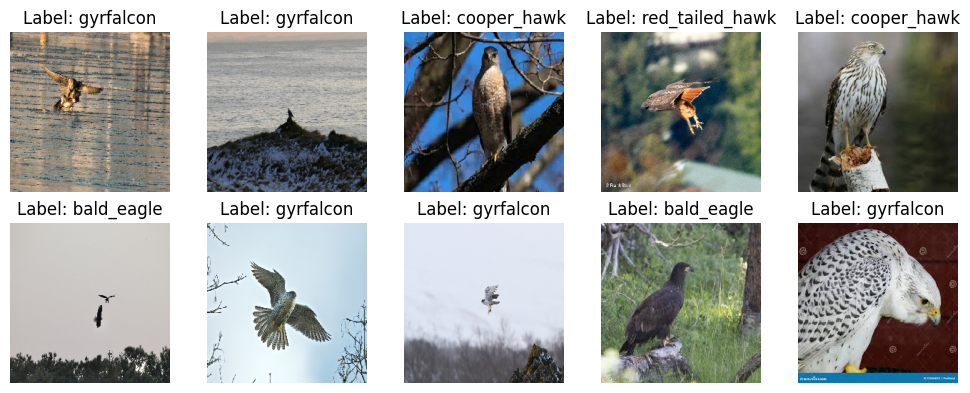

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Create an ImageDataGenerator for loading and preprocessing images
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2  # Use 20% of data for validation
)

# Load the training data
train_data = train_datagen.flow_from_directory(
    'bird_of_prey',  # Replace with your dataset directory
    target_size=(224, 224),  # Resize images to 150x150
    batch_size=20,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

# Load the validation data
val_data = train_datagen.flow_from_directory(
    'bird_of_prey',  # Replace with your dataset directory
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',  # Multi-class classification
    subset='validation'
)

# Display some images
images, labels = next(train_data)  # Load a batch of images and labels
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])  # Display the image
    label_index = tf.argmax(labels[i]).numpy()  # Convert one-hot to class index
    class_labels = list(train_data.class_indices.keys())  # Get class labels
    ax.set_title(f"Label: {class_labels[label_index]}")  # Show label
    ax.axis('off')
plt.tight_layout()
plt.show()


**Optimized CNN Model for Multi-Class Image Classification**

This code defines and compiles a Convolutional Neural Network (CNN) for classifying images into 8 categories using TensorFlow and Keras.

- Model Architecture: A Sequential CNN with multiple convolutional layers, batch normalization, and max-pooling layers.
- Regularization Techniques: Dropout and Batch Normalization are used to prevent overfitting and improve model stability.

- Compilation:

    - Optimizer: Adam with a lower learning rate for fine-tuning.
    - Loss Function: Categorical cross-entropy for multi-class classification.
    - Metrics: Accuracy to evaluate performance.

In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

## Define an optimized CNN model for multi-class classification
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),  # Normalize feature maps
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.6),  # Dropout to prevent overfitting
    Dense(8, activation='softmax')  # Multi-class classification (8 species)
])


# Compile the model with a multi-class loss function
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for better convergence
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)


/home/fiyrex/Artefical intelligence/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Training a CNN Model with Callbacks in TensorFlow**

This code trains a Convolutional Neural Network (CNN) for image classification, utilizing callbacks to save the best model and stop training early when performance stagnates.

- Callbacks:

    - ModelCheckpoint: Saves the model with the best validation accuracy during training.
    - EarlyStopping: Stops training if the validation loss does not improve after a certain number of epochs (patience).

- Model Training:

    - Trains the model using the training dataset.
    - Validates the model with the validation dataset at each epoch.
    - Uses callbacks to enhance the training process.

In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint("best_model3.keras", monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)  # Lower patience


# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Number of epochs
    steps_per_epoch=train_data.samples // train_data.batch_size,  # Training steps
    validation_steps=val_data.samples // val_data.batch_size,  # Validation steps
    callbacks=[checkpoint, early_stop]  # Use callbacks
)



/home/fiyrex/Artefical intelligence/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1737349570.984827    8477 service.cc:148] XLA service 0x7f5320017f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737349570.984980    8477 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-01-20 13:06:11.043723: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737349571.339003    8477 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/400 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.1500 - loss: 5.0880  

I0000 00:00:1737349578.244461    8477 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2256 - loss: 3.3162
Epoch 1: val_accuracy improved from -inf to 0.26400, saving model to best_model3.keras
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 91ms/step - accuracy: 0.2256 - loss: 3.3141 - val_accuracy: 0.2640 - val_loss: 1.9922
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3114 - loss: 1.8660
Epoch 2: val_accuracy improved from 0.26400 to 0.36750, saving model to best_model3.keras
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.3114 - loss: 1.8660 - val_accuracy: 0.3675 - val_loss: 1.6539
Epoch 3/10
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3658 - loss: 1.7035
Epoch 3: val_accuracy improved from 0.36750 to 0.39900, saving model to best_model3.keras
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.3659 - loss: 1.7035 - val_accuracy: 0.3990 - val_loss: 1.6186
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4217 - loss: 1.5856
Epoch 4: val_accuracy improved from 0.3

**Plotting Training and Validation Metrics**

This code visualizes the training and validation accuracy and loss over the epochs using Matplotlib. These plots help evaluate the model's performance during training and identify potential overfitting or underfitting.


**Key Observations**

**Graph Analysis**

1. Training vs Validation Accuracy

- Trend: Training accuracy (blue line) increases steadily across epochs, indicating the model is learning from the training data.
- Validation accuracy (orange line) also improves over time but at a slower rate, showing signs of generalization.
- Gap: A slight gap between training and validation accuracy is visible, which suggests the model may be starting to overfit but is still performing relatively well.


2. Training vs Validation Loss

- Trend: Both training loss (blue line) and validation loss (orange line) decrease as epochs progress, which is typical in well-trained models.
- Convergence: The validation loss does not decrease as sharply as the training loss, which might suggest minor overfitting, especially in later epochs.
- The validation loss curve appears smoother and stabilizes compared to the training loss.

**Final Conclusion:**

The model is exhibiting mild overfitting in later epochs. While it has learned from the training data effectively, its generalization to the validation data is slightly less optimal.


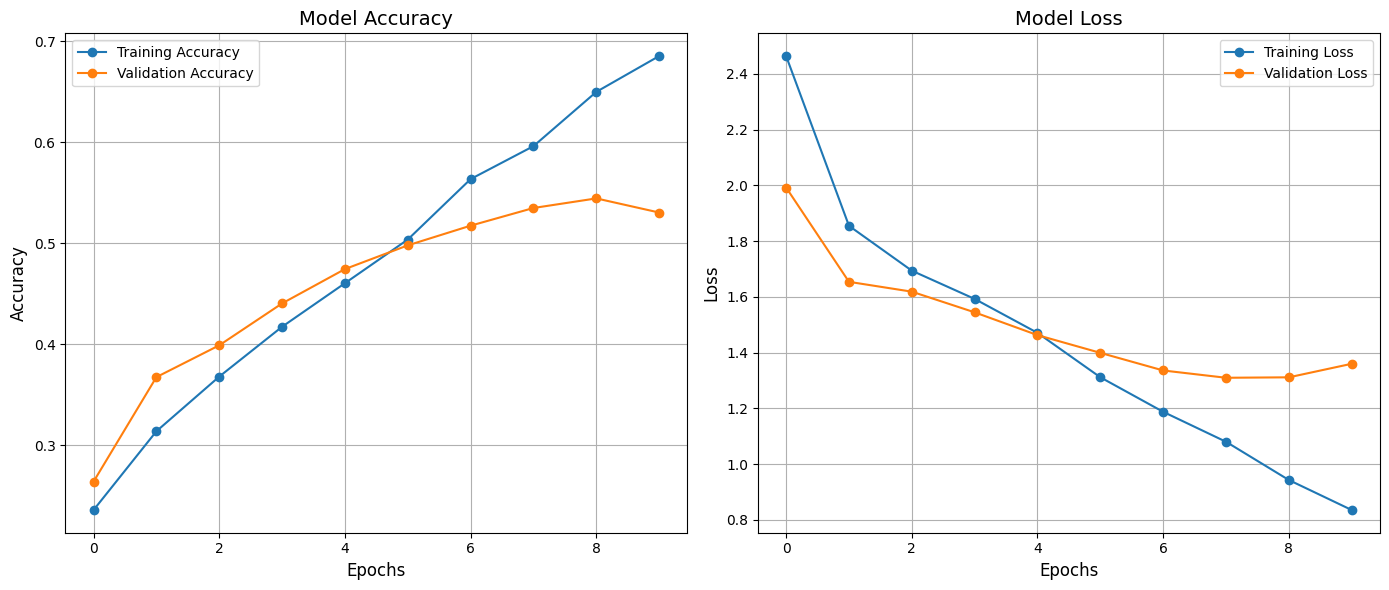

In [4]:
# Task 1: Graphs for Model Loss and Accuracy
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 6))  # Increased figure size for better layout

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

**Displaying Predictions and Accuracy of a CNN Model using dataset**

- This code demonstrates how to:

    - Load a pre-trained model.
    - Use the model to make predictions on randomly selected validation samples.
    - Compare the predicted labels with the true labels.
    - Visualize the predictions alongside their true labels and calculate the accuracy for the displayed samples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


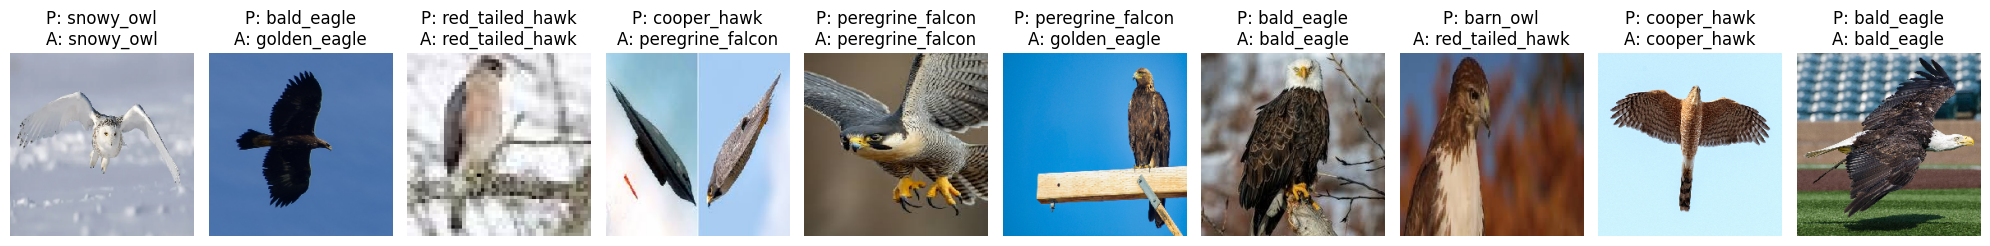

Accuracy = 60.00%


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model = keras.models.load_model('best_model3.keras')

# Get the class labels from the generator
class_labels = list(val_data.class_indices.keys())  # Map indices to class names
num_classes = len(class_labels)

# Choose a few random samples from the validation set
num_samples_to_display = 10
count = 0

# Display the samples and their predicted and actual labels
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(20, 4))

for i, ax in enumerate(axes.flat):
    # Load a batch of images and labels from the validation generator
    images, labels = next(val_data)
    sample_index = np.random.randint(0, len(images))  # Random index in batch
    
    # Extract the image and its true label
    image = images[sample_index]
    true_label_index = np.argmax(labels[sample_index])  # Convert one-hot to index
    true_label = class_labels[true_label_index]
    
    # Make prediction using the model
    prediction = model.predict(np.expand_dims(image, axis=0))  # Expand dims for prediction
    predicted_label_index = np.argmax(prediction[0])  # Index of max probability
    predicted_label = class_labels[predicted_label_index]
    
    # Display the image
    ax.imshow(image)
    ax.set_title(f"P: {predicted_label}\nA: {true_label}")
    ax.axis('off')
    
    # Count correct predictions
    if predicted_label == true_label:
        count += 1

plt.tight_layout()
plt.show()

# Calculate and display accuracy for the displayed samples
print(f"Accuracy = {(count / num_samples_to_display) * 100:.2f}%")


**Testing a CNN Model on Random Images with Predictions and Visualization**

- Makes predictions for each selected image and compares them to the actual labels extracted from filenames.
- Displays 8 randomly selected images with their predicted and actual labels.
- Calculates the accuracy for the displayed samples.



Processing image: snowy_owl.0.jpg at path: test_images/snowy_owl.0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Predicted Label: gyrfalcon, Actual Label: snowy_owl

Processing image: gyrfalcon.0.jpg at path: test_images/gyrfalcon.0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Label: gyrfalcon, Actual Label: gyrfalcon

Processing image: bald_eagle.0.jpg at path: test_images/bald_eagle.0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Label: bald_eagle, Actual Label: bald_eagle

Processing image: barn_owl.0.jpg at path: test_images/barn_owl.0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: barn_owl, Actual Label: barn_owl

Processing image: red_tailed_hawk.0.jpg at path: test_images/red_tailed_hawk.0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Label: red_tailed_hawk, Actual Label: red_tailed_hawk

Processing image: peregrine_falcon.0.jpg at path: test_images/peregrine_falcon.0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Label: peregrine_falcon, Actual

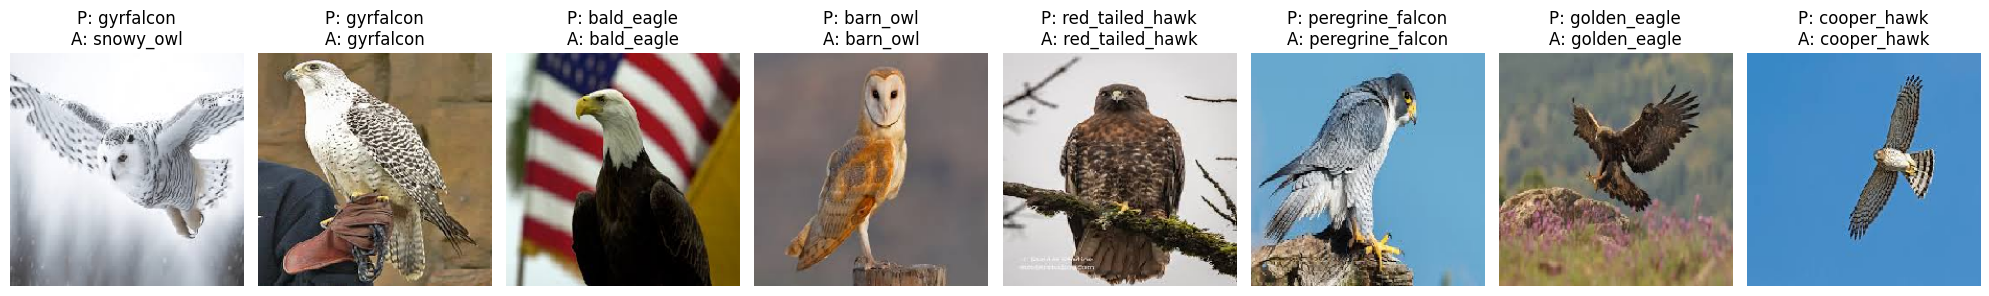


Accuracy  = 87.50%


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the model
model = load_model('best_model3.keras')

# Directory containing test images
test_images_dir = 'test_images/'  # Update with the correct directory path

# Get all image files in the test_images directory
image_files = [f for f in os.listdir(test_images_dir) if os.path.isfile(os.path.join(test_images_dir, f))]

# Check if there are any images in the folder
if len(image_files) == 0:
    print("No images found in the test_images directory.")
    exit()

# Define class labels (ensure this matches the training labels)
class_labels = ["bald_eagle", "barn_owl", "cooper_hawk", "golden_eagle", "gyrfalcon", "peregrine_falcon", "red_tailed_hawk", "snowy_owl"]

# Function to extract actual label from filename
def get_actual_label_from_filename(file_name):
    """Extract the actual label from the file name."""
    # Assuming the file name format is 'label.index.extension', e.g., 'bald_eagle.0.jpg'
    parts = file_name.rsplit('.', 2)  # Split from the right to handle extensions like '.jpeg'
    if len(parts) < 3:
        raise ValueError(f"Invalid file name format: {file_name}. Expected format: 'label.index.extension'")
    return parts[0]  # Extract 'label' before the first dot

# Number of samples to randomly display
num_samples_to_display = 10
num_samples_to_display = min(num_samples_to_display, len(image_files))  # Ensure we don't exceed available images

# Randomly select files from the test_images folder
selected_files = np.random.choice(image_files, num_samples_to_display, replace=False)

# Count correct predictions for displayed samples
correct_predictions = 0

# Display the samples and their predicted and actual labels
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(20, 4))

for i, file_name in enumerate(selected_files):
    img_path = os.path.join(test_images_dir, file_name)
    print(f"\nProcessing image: {file_name} at path: {img_path}")

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

    # Make prediction using the model
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_label = class_labels[predicted_index]

    # Extract actual label from file name
    try:
        actual_label = get_actual_label_from_filename(file_name)
    except ValueError as e:
        print(e)
        continue

    # Print predictions and actual labels
    print(f"Predicted Label: {predicted_label}, Actual Label: {actual_label}")

    # Display the image
    ax = axes[i]
    ax.imshow(np.array(img).astype('uint8'))
    ax.set_title(f"P: {predicted_label}\nA: {actual_label}")
    ax.axis('off')

    # Check if prediction matches actual label
    if predicted_label == actual_label:
        correct_predictions += 1

plt.tight_layout()
plt.show()

# Calculate and display accuracy for the displayed samples
accuracy = (correct_predictions / num_samples_to_display) * 100
print(f"\nAccuracy  = {accuracy:.2f}%")


**Display the evaluation using confusion matrix**

This code evaluates a classification model by generating a classification report (precision, recall, F1-score, and support for each class) using classification_report from sklearn and visualizing a confusion matrix as a heatmap with seaborn. It takes the true and predicted labels along with class names, prints the classification metrics, and displays the confusion matrix, helping analyze model performance and misclassifications effectively.


In [35]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_metrics(true_classes, predicted_classes, class_labels):
    # Classification Report
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    print("Classification Report:\n", report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


**mAP(Mean Average Precision)**

This code calculates Mean Average Precision (mAP) for multi-class classification. For each class, it converts true labels to binary, extracts predicted scores, and computes Average Precision (AP) using average_precision_score. It stores AP values for each class in a dictionary and calculates the overall mAP by averaging these values. Finally, it prints the AP for each class and the mAP, providing a detailed evaluation of the model's performance in ranking predictions.


In [36]:
from sklearn.metrics import average_precision_score
import numpy as np

def calculate_map(true_classes, predictions, num_classes, class_labels):
    average_precisions = []
    ap_per_class = {}

    for i in range(num_classes):
        # Convert true classes to binary for the current class
        true_binary = (true_classes == i).astype(int)
        pred_scores = predictions[:, i]
        
        # Calculate Average Precision (AP) for the current class
        ap = average_precision_score(true_binary, pred_scores)
        average_precisions.append(ap)
        ap_per_class[class_labels[i]] = ap

    # Calculate mean Average Precision (mAP)
    mean_ap = np.mean(average_precisions)


    # Print AP for each class
    for label, ap in ap_per_class.items():
        print(f"Class {label}: AP = {ap:.2f}\n")

    
    print(f"Mean Average Precision (mAP): {mean_ap:.2f}")

    return mean_ap, ap_per_class


**Evaluate the performance of the model against the testing dataset**

This code evaluates a deep learning model's performance on a test dataset by preprocessing images with ImageDataGenerator, computing test loss and accuracy using model.evaluate, and generating predictions with model.predict. It then calculates detailed metrics (classification report, confusion matrix) using calculate_metrics and computes Mean Average Precision (mAP) with calculate_map, providing a comprehensive evaluation of the model's classification and ranking performance.

Found 10000 images belonging to 8 classes.


/home/fiyrex/Artefical intelligence/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 - 32s - 64ms/step - accuracy: 0.8008 - loss: 0.6444
Test Loss: 0.6444199681282043
Test Accuracy: 0.8008000254631042
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 63ms/step
Classification Report:
                   precision    recall  f1-score   support

      bald_eagle       0.85      0.79      0.82      1250
        barn_owl       0.94      0.86      0.90      1250
     cooper_hawk       0.78      0.87      0.82      1250
    golden_eagle       0.75      0.81      0.78      1250
       gyrfalcon       0.82      0.65      0.73      1250
peregrine_falcon       0.69      0.87      0.77      1250
 red_tailed_hawk       0.71      0.68      0.69      1250
       snowy_owl       0.93      0.87      0.90      1250

        accuracy                           0.80     10000
       macro avg       0.81      0.80      0.80     10000
    weighted avg       0.81      0.80      0.80     10000



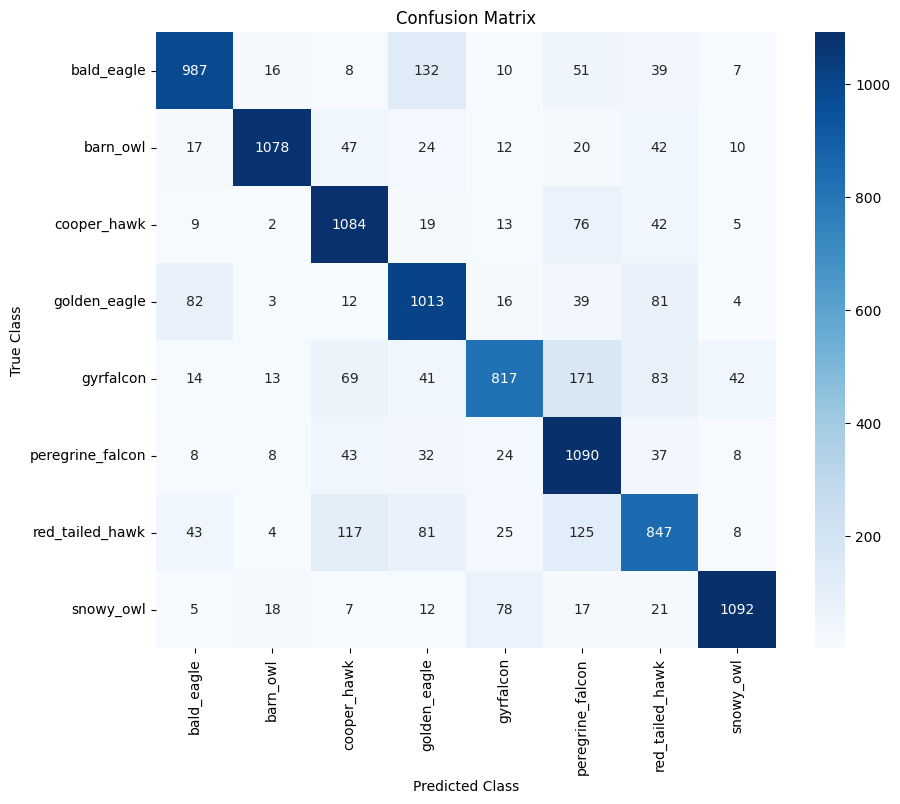

Class bald_eagle: AP = 0.90

Class barn_owl: AP = 0.95

Class cooper_hawk: AP = 0.91

Class golden_eagle: AP = 0.85

Class gyrfalcon: AP = 0.82

Class peregrine_falcon: AP = 0.88

Class red_tailed_hawk: AP = 0.78

Class snowy_owl: AP = 0.96

Mean Average Precision (mAP): 0.88


In [37]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_data = test_datagen.flow_from_directory(
    'bird_of_prey',  # Replace with your test dataset directory
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Maintain order for predictions
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Call Metrics and mAP Calculation
calculate_metrics(true_classes, predicted_classes, class_labels)
map_score = calculate_map(true_classes, predictions, len(class_labels),class_labels)

## 1. Overall Performance

**Test Accuracy:** The model achieved a test accuracy of 80.08%, showing a solid ability to correctly classify bird species.

**Test Loss:** The test loss of 0.6444 indicates room for improvement in prediction confidence and error minimization.

**Mean Average Precision (mAP):** The overall mAP is 0.88, highlighting the model's strength in ranking predictions accurately across all classes.

## 2. Per-Class Analysis

From the classification report and confusion matrix:

**High-performing classes:**

- **Barn Owl:** Precision (94%), Recall (86%), F1-Score (92%), and AP (0.95).

- **Snowy Owl:** Precision (93%), Recall (87%), F1-Score (90%), and AP (0.96).

**Moderate performance:**

- **Bald Eagle**, **Cooper Hawk**, and **Golden Eagle** achieved F1-scores between 82-85% with AP values of 0.90, 0.91, and 0.85, respectively.

**Underperforming classes:**

- **Red-Tailed Hawk:** Lowest F1-score (69%) and AP (0.78), indicating difficulties in distinguishing this class.

- **Peregrine Falcon** and **Gyrfalcon** also had lower F1-scores (67% and 73%) but slightly better AP values (0.88 and 0.82).

## 3. Confusion Matrix Observations

Misclassifications were more frequent in visually similar species, such as **Red-Tailed Hawk** and **Gyrfalcon**, likely due to overlapping features.

**Barn Owl** and **Snowy Owl** had minimal misclassification, reflecting distinctive features learned by the model.

## 4. Strengths

The model demonstrates strong ranking capabilities (high mAP).

It performs exceptionally well for **Barn Owl** and **Snowy Owl**, with high precision and recall metrics.

## 5. Weaknesses

Performance drops for classes with visually similar features (e.g., **Peregrine Falcon** and **Red-Tailed Hawk**).

The confusion matrix reveals instances where certain species are frequently misclassified.

## Conclusion

The model performs well overall, achieving 80.08% accuracy, 0.88 mAP, and reliable metrics for most species. While it excels in certain classes, addressing challenges in underperforming classes will further enhance its robustness and real-world applicability.